In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# DATA Understanding 

In [ ]:
! ls ../data


In [ ]:
df = pd.read_csv('../data/kc_house_data.csv')

In [ ]:
df.shape

we have the information of 21597 houses located in King county washington 

In [ ]:
df.info()

In [ ]:
df.describe()

We can see above, dataset has null values in some columns

### Price column

In [ ]:
df['price']

### ID column

duplicate values on 'id' column, some houses show up more than once on dataset

In [ ]:
df['id'].value_counts()

In [ ]:
df.loc[df["id"]==2044500213]

House appering 2 or more times, has different price changing over time, will consider keeping latest price, or keeping duplicates since they can be trated as sale data points, not houses alone

### Bedrooms

In [ ]:
df['bedrooms'].value_counts()

house with 33 bedrooms, looked for id number and found out it has only 3 bed rooms, value will be replaced, same for house with 11 rooms, zillow shows it has only 4 rooms.

In [ ]:
df.loc[df["bedrooms"]==33]

### Waterfront column

above we can see on waterfront value, the 3 row has null value, for a NO response

In [ ]:
# Whether the house is on a waterfront
#   * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, 
#     Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts

# column has 2353 null values, those might be taken as NO 

#categorical, has some null values
df['waterfront'].value_counts()

In [ ]:
df['waterfront'].isnull().sum()

In [ ]:
df['waterfront'].mode()

### Date

data set goes back to 2014 and most recent data points are from 2015

In [ ]:
# Dates
df['date'].value_counts()

### View

Categorical data

In [ ]:
# Quality of view from house
# categorical data
df['view'].value_counts()

### Condition

In [ ]:
# categorical data
df['condition'].value_counts()

### Grade

In [ ]:
# categorical data
df['grade'].value_counts()

### sqft_basement

In [ ]:
# numeric data needed to convert from str to int data type
df['sqft_basement'].value_counts()

/




# Data Preparation

Our target

In [ ]:
df['price']

In [ ]:
df['price'].describe()

In [ ]:
df['price'].isna().sum()

### Cleaning ID column
will drop duplicate values from id column, keeping most recent record of the house

In [ ]:
df.drop_duplicates(subset='id', keep='last', inplace=True)

In [ ]:
df.loc[df["id"]==2044500213]

In [ ]:
df['id'].isna().sum()

### cleaning bedroom column

will replace outlier/incorrect values from bedrooms column

In [ ]:
df["bedrooms"].value_counts()

In [ ]:
df.loc[df["bedrooms"]==33, 'bedrooms'] = 3
df.loc[df["bedrooms"]==11, 'bedrooms'] = 4

In [ ]:
df['bedrooms'].isna().sum()

### Cleaning Waterfront column

In [ ]:
df['waterfront'].value_counts()

will change NaN values to NO since, since it is the most frequent value under that column

In [ ]:
df['waterfront'].isnull().sum()

In [ ]:
df['waterfront'] = df['waterfront'].replace(np.nan, 'NO')


In [ ]:
df['waterfront'].value_counts()[0]+df['waterfront'].value_counts()[1]

In [ ]:
df['waterfront'].isna().sum()

### Cleaning view column

In [ ]:
df['view'].value_counts()

In [ ]:
df['view'].isna().sum()

In [ ]:
df['view'] = df['view'].replace(np.nan, 'NONE')

In [ ]:
df

In [ ]:
df['view'].isna().sum()

### Cleaning sqft_basement column

Will proceed and transform data on sqft_basement column from str to a int type

In [ ]:
df['sqft_basement'].value_counts()

In [ ]:
df['sqft_basement'].isna().sum()

no Nan values,  '?' is a frequent value on the column

In [ ]:
df.head(5)


Something I noticed is how  sqft_living value is the total sqft living area in the house + basement, 
and if the basement column shows 0.0 or '?' sqft_living is same as sqft_above, 
so we should consider changing '?' to 0.0, and have a  full numeric column we can work with later on


In [ ]:
# Changed all '?' to '0.0'
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = '0.0'


will change object type data to int

In [ ]:
df['sqft_basement'] = df['sqft_basement'].replace(',','.').astype(float)

In [ ]:
type(df['sqft_basement'][0])

# Droping columns
- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

In [ ]:
df = df.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated',
         'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

In [ ]:
df.head()

#  Modeling / Exploration

In [ ]:
df.corr()

# working on categorical and discrete columns

- floors
- waterfront
- condition
- grade
- yr_built

# Price and floors

In [ ]:
df['floors'].unique()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

df.plot.scatter(x="floors", y="price", ax=ax1)
df.groupby("floors").mean().plot.bar(y="price", ax=ax2);

In [ ]:
Y = np.log(df["price"])
y = df['price']
X_floors = df['floors']

Xcon_floors = sm.add_constant(X_floors)


modelf = sm.OLS(Y, Xcon_floors).fit()
modelf.summary()

normality assumptions

In [ ]:
fig, ax = plt.subplots()
sns.histplot(modelf.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("");

In [ ]:
model_preds = modelf.predict(Xcon_floors)
resids = Y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)
ax.set_xlabel('')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

### Price and  waterfront

In [ ]:
y = df['price']
x_waterfront = pd.get_dummies(df['waterfront'], drop_first=True)

xcon_waterfront = sm.add_constant(x_waterfront)


modelw = sm.OLS(Y, xcon_waterfront).fit()
modelw.summary()

In [ ]:
fig, ax = plt.subplots()
sns.histplot(model4.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("");

In [ ]:
model_preds = modelw.predict(xcon_waterfront)
resids = Y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)
ax.set_xlabel('')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

### Price vs condition

In [ ]:
df['condition'].unique()

In [ ]:
y = df['price']
x_condition = pd.get_dummies(df['condition'], drop_first=True)

xcon_condition = sm.add_constant(x_condition)


modelc = sm.OLS(Y, xcon_condition).fit()
modelc.summary()

In [ ]:
fig, ax = plt.subplots()
sns.histplot(model3.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("");

In [ ]:
model_preds = modelc.predict(xcon_condition)
resids = Y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)
ax.set_xlabel('')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

# price and Grade

In [ ]:
df['grade'].value_counts()

In [ ]:
df.loc[df['grade'] == '13 Mansion']

In [ ]:
df.drop(7245, inplace = True)

In [ ]:
df.drop(9245, inplace = True)

In [ ]:
df.drop(3910, inplace = True)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=df['grade'], y=df["price"]);

In [ ]:
df11 = df.loc[df['grade'] == '11 Excellent']
df11.loc[df11['price'] == df11['price'].max()]

re organizing rows to be in order from 3 poor to 13 mansion

In [ ]:
x3 = pd.get_dummies(df['grade'])
x3 = x3[['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better',
         '10 Very Good', '11 Excellent', '12 Luxury']]
x3

In [ ]:
Y = np.log(df["price"])
y= df["price"]


x_grade = x3.drop('7 Average', axis=1)

xcon_grade = sm.add_constant(x_grade)

modelg = sm.OLS(y, xcon_grade).fit()
modelg.summary()

 7 Average is the reference category.

In [ ]:
fig, ax = plt.subplots()
sns.histplot(modelg.resid, bins=50, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("");

In [ ]:
model_preds = modelg.predict(xcon_grade)
resids1 = y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids1)
ax.set_xlabel('')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

In [ ]:
resids1.hist(bins=50);

In [ ]:
sm.qqplot(resids1, line='r');

### model with grade, yr built, floors, waterfront

In [21]:
water = pd.get_dummies(df['waterfront'], drop_first=True)

In [22]:
condi = pd.get_dummies(df['condition'], drop_first=True)

In [23]:
X = pd.concat([x3_f, df['yr_built'], df['floors'], condi, water], axis=1)
# X = pd.concat([x3, df['floors']], axis=1)
X

NameError: name 'x3_f' is not defined

In [24]:
X_con = sm.add_constant(X)
# y=df['price']

model = sm.OLS(Y, X_con).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1493.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:52:03   Log-Likelihood:                -15145.
No. Observations:               21420   AIC:                         3.030e+04
Df Residuals:                   21417   BIC:                         3.032e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6028      0.010   1276.186      0.000      12.583      12.622
floors         0.2956      0.006     47.606      0.000       0.283       0.308
YES            1.0530      0.041     25.833      0.000       0.973       1.133
==============================================================================
Omnibus:                      588.217   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              671.323
Skew:                           0.377   Prob(JB):                    1.67e-146
Kurtosis:                       3.429   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

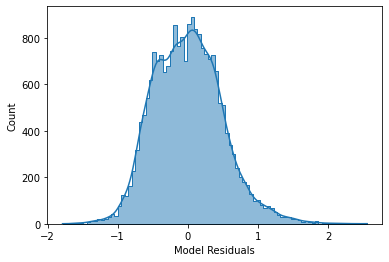

In [25]:
fig, ax = plt.subplots()
sns.histplot(model.resid, bins='auto', element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("");